# Import modules

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [2]:
def data_details(d):
    print('____________________________________________________')
    missig_val = sum(d.isna().sum())
    all_val = sum((d.count()))
    sparsity = missig_val / all_val
    print( 'Sparisty : {:.2f}'.format(sparsity))
    cl = np.unique(d['class'])
    print('Classes : ' , cl)
    num_src = []
    num_obs = []
    for c in cl:
        s = len(np.unique(d[d['class']==c]['src_id']))
        o = len(d[d['class']==c])
        num_src.append(s)
        num_obs.append(o)
    deets = pd.DataFrame(
        {
            "Class" : cl , 
            "# Source" : num_src , 
            "# Obs" : num_obs
        }
    )
    display(deets) 
    print('Total Number os sources : ' , sum(num_src))
    print('Total number of obs :' , sum(num_obs))
    print('____________________________________________________')
    
#data_details(df)

# Load data

## Before imputation

In [3]:
df = pd.read_csv('../processed_data/BH_.csv', index_col='obs_id')
df_bh = df.copy()

df = pd.read_csv('../processed_data/NS_.csv' , index_col='obs_id')
df_ns = df.copy()

df = pd.read_csv('../processed_data/CV_.csv' , index_col='obs_id')

df_cv = df.copy()

df = pd.read_csv('../processed_data/PULSAR_.csv' , index_col='obs_id')

df_pl = df.copy()

df_no_imp = pd.concat([df_bh , df_ns , df_cv , df_pl] , axis=0)
data_details(df_no_imp)

____________________________________________________
Sparisty : 0.58
Classes :  ['BH' 'CV' 'NS' 'PULSAR']


,Class,# Source,# Obs
0,BH,29,199
1,CV,70,786
2,NS,52,440
3,PULSAR,126,445


Total Number os sources :  277
Total number of obs : 1870
____________________________________________________


In [4]:
df = pd.read_csv('imp_data/BH_src_imp.csv' , index_col='obs_id')
df_bh = df.copy()

df = pd.read_csv('imp_data/NS_src_imp.csv' ,  index_col='obs_id')
df_ns = df.copy()

df = pd.read_csv('imp_data/CV_src_imp.csv',  index_col='obs_id')
df_cv = df.copy()

df = pd.read_csv('imp_data/PULSAR_src_imp.csv',  index_col='obs_id')
df_pl = df.copy()

df = pd.concat([df_bh , df_ns , df_cv , df_pl] , axis=0)
#display(df)

df = df.replace('NS' , 'XRB')
df = df.replace('BH' , 'XRB')
#class_to_select = ['XRB' , 'CV' , 'PULSAR']
df = df.replace({
    'XRB' : 1 , 
    "CV" : 2 ,
    "PULSAR" :3
})
class_to_select = [1,2,3]
df = df[df['class'].isin(class_to_select)]
data_details(df)

____________________________________________________
Sparisty : 0.05
Classes :  [1 2 3]


,Class,# Source,# Obs
0,1,75,460
1,2,65,515
2,3,118,319


Total Number os sources :  258
Total number of obs : 1294
____________________________________________________


Let us see , how many values are still missing in each column

In [5]:
info_col = ['class' , 'significance' , 'src_n' , 'src_id']
x = df.drop(columns=info_col)
y = df['class']
i = df[info_col]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , stratify=y)
display(x_train , y_train , x_test , y_test)

,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,photflux_aper_hilim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
NS_OBS_349,-5.633951,-6.498804,-5.982549,-5.719649,-6.335452,-6.403657,-5.764219,-6.950374,-6.763715,-5.833570,...,0.000632,0.4778,0.9038,0.9994,1.0000,0.6352,0.6359,0.7726,1.0000,0.9994
PULSAR_OBS_293,-4.346595,-4.986741,-5.054630,-4.376544,-4.941954,-4.945004,-4.945004,-5.014484,-5.036684,-4.408713,...,0.004607,-0.0893,-0.1543,-0.0525,0.0381,-0.1405,-0.0087,0.0718,0.0331,-0.0612
CV_OBS_653,-5.400772,-6.135133,NaN,-5.613858,-5.876148,-6.050512,-6.177832,-6.731656,-6.964570,-6.090926,...,0.000806,-1.0000,-1.0000,-0.1012,0.3716,-0.5528,-0.9994,-0.0868,-0.1555,-0.9994
NS_OBS_209,-4.991400,-5.727462,-5.747147,-5.041102,-5.643974,-5.491605,-5.540306,-5.589729,-5.830914,-5.097562,...,0.001504,-0.0331,-0.2954,-0.2673,-0.1318,-0.3954,0.1199,0.2655,-0.0081,-0.1537
NS_OBS_23,-5.572189,NaN,-7.310780,-5.852015,-6.257118,NaN,-5.698102,NaN,NaN,-7.174314,...,NaN,0.3779,NaN,NaN,NaN,NaN,0.9994,1.0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BH_OBS_118,-5.361311,-6.145572,-6.403293,-5.421475,-6.043591,-5.768021,-6.082915,-5.869988,-6.279097,-5.491336,...,0.000619,-0.2904,-0.6340,-0.4210,-0.2842,-0.5478,-0.0712,0.1368,-0.3279,-0.4834
BH_OBS_35,-4.130592,-4.727462,-4.738261,-4.174899,-4.664141,-5.153230,-4.580375,-5.292430,-4.801893,-4.224171,...,0.011554,-0.0231,0.4104,0.4547,0.5715,0.3317,0.0949,0.2092,0.6377,0.5284
NS_OBS_82,-5.242943,-5.027011,-4.283746,-5.433028,-4.941574,-5.547141,-4.174964,-5.736364,-5.140982,-5.469027,...,0.001059,0.6627,0.8713,0.5334,0.6690,0.3779,0.7245,0.7839,0.9363,0.9069


obs_id
NS_OBS_349        1
PULSAR_OBS_293    3
CV_OBS_653        2
NS_OBS_209        1
NS_OBS_23         1
                 ..
BH_OBS_118        1
BH_OBS_35         1
NS_OBS_82         1
PULSAR_OBS_435    3
NS_OBS_336        1
Name: class, Length: 1035, dtype: int64

,photflux_aper_hilim_b,photflux_aper_m,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_hilim_m,photflux_aper_s,photflux_aper_hilim_h,photflux_aper_lolim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,var_mean,hard_hm_lolim,hard_hs_lolim,hard_ms,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hm_hilim,hard_hs_hilim,hard_hs
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_OBS_339,-4.432033,-5.390939,-5.633017,-4.444180,-5.363312,-4.673255,-5.545155,-4.688034,-5.420445,-4.457548,...,0.004946,-0.274200,-0.8014,-0.679600,-0.659000,-0.697700,-0.21860,-0.161800,-0.7614,-0.7820
BH_OBS_50,-5.167491,-5.829445,-7.060032,-5.220115,-5.752763,-5.651306,-6.423198,-5.734004,-5.928855,-5.279923,...,0.001075,-0.862600,-0.9088,-0.198600,-0.071800,-0.319200,-0.72830,-0.569000,-0.6939,-0.8107
CV_OBS_302,-6.411168,-6.140434,-7.569280,-6.723538,-6.103375,-5.658419,-6.433680,-6.817499,-7.399916,-6.274845,...,0.003436,-0.189178,-0.4491,-0.962499,-0.041261,-0.931496,0.52364,0.833986,0.6777,-0.0462
NS_OBS_424,-3.560194,-4.136142,-4.692076,-3.580209,-4.107127,-4.085921,-4.562567,-4.117419,-4.169283,-3.601019,...,0.032698,-0.566500,-0.6040,-0.056200,-0.008100,-0.105600,-0.50590,-0.446600,-0.4903,-0.5472
PULSAR_OBS_182,-4.356153,-5.385208,-4.518988,-4.384155,-5.318759,NaN,-4.460297,NaN,-5.469160,-4.414201,...,0.013792,0.738900,0.9650,0.999400,1.000000,0.747700,0.77450,0.811400,1.0000,0.9994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_166,-5.466101,-6.436163,-5.873219,-5.559091,-6.247875,-6.867100,-5.625985,NaN,-6.776245,-5.677574,...,0.000798,0.499100,0.7252,0.446000,0.787600,0.029400,0.67830,0.822600,0.9725,0.8707
CV_OBS_458,-3.638839,-4.561299,-4.223735,-3.645507,-4.546223,-4.104136,-4.197568,-4.114526,-4.577903,-3.652475,...,0.033775,0.365400,-0.1405,-0.483400,-0.469100,-0.500300,0.38480,0.404100,-0.1043,-0.1224
CV_OBS_616,-5.919013,-7.108909,-7.055912,-6.013273,-6.887060,-6.327071,-6.535660,-6.471726,-7.586030,-6.133831,...,0.000287,0.134300,-0.6215,-0.720800,-0.536500,-0.871300,0.47970,0.748900,-0.1568,-0.3985


obs_id
CV_OBS_339        2
BH_OBS_50         1
CV_OBS_302        2
NS_OBS_424        1
PULSAR_OBS_182    3
                 ..
PULSAR_OBS_166    3
CV_OBS_458        2
CV_OBS_616        2
CV_OBS_212        2
CV_OBS_403        2
Name: class, Length: 259, dtype: int64

In [6]:
clf = xgb.XGBRFClassifier(random_state=42)
x_train_z = x_train.replace(np.nan , 0)
x_test_z = x_test.replace(np.nan , 0)
clf = RandomForestClassifier()
clf.fit(
    x_train_z , y_train
)
train_score = clf.score(x_train_z , y_train)
test_score = clf.score(x_test_z , y_test)
print(train_score , test_score)

0.9942028985507246 0.8455598455598455


# Source-wise data split

We will split the data based on source, however we want to select the sources having least number of observations for testing ,
so first we sort soure list by number of observations , then from the top 50 % , we pick 40 percent from each class , hence source-wise we have finally 20 percent sources

In [44]:
df = pd.read_csv('imp_data/BH_src_imp.csv' , index_col='obs_id')
df_bh = df.copy()

df = pd.read_csv('imp_data/NS_src_imp.csv' ,  index_col='obs_id')
df_ns = df.copy()

df = pd.read_csv('imp_data/CV_src_imp.csv',  index_col='obs_id')
df_cv = df.copy()

df = pd.read_csv('imp_data/PULSAR_src_imp.csv',  index_col='obs_id')
df_pl = df.copy()
df = pd.concat([df_bh , df_ns , df_cv , df_pl] , axis=0)
#display(df)


In [45]:
src_list = pd.DataFrame()
cl_list = ['BH' , 'NS' , 'CV' , 'PULSAR']
for cl in cl_list:
    src = df[df['class']==cl]['src_id'].value_counts().sort_values()
    src = src.iloc[:int(len(src)/2)]
    src_select = src.sample(frac=0.6)
    src_id = src_select.index.to_list()
    src_obs = src_select.to_list()
    temp_src = pd.DataFrame({ 
        'src_id' : src_id , 
        'obs_count' : src_obs
    })
    src_list = src_list.append(temp_src)
#src_list

In [46]:
all_src = np.unique(df['src_id'].to_list())
test_src = src_list['src_id']
train_src= list(set(all_src) - set(src_list['src_id']))
print('Total Number of ssources :' , len(all_src))
print('Training_sources : ' , len(train_src) )
print('Validation sources :' , len(test_src))

Total Number of ssources : 258
Training_sources :  182
Validation sources : 76


In [47]:
info_col = ['class' , 'significance' , 'src_n' , 'src_id']
df_train  = df[df['src_id'].isin(train_src)]
df_test = df[df['src_id'].isin(test_src)]

#class_to_select = ['XRB' , 'CV' , 'PULSAR']
df_train = df_train.replace({"BH" : 0 ,"NS" : 0 , "CV" : 1 ,"PULSAR" :2})
df_test = df_test.replace({"BH" : 0 ,"NS" : 0 , "CV" : 1 ,"PULSAR" :2})
class_to_select = [1,2,3]
df = df[df['class'].isin(class_to_select)]
#data_details(df)

data_details(df_train)
data_details(df_test)

____________________________________________________
Sparisty : 0.04
Classes :  [0 1 2]


,Class,# Source,# Obs
0,0,53,430
1,1,46,474
2,2,83,284


Total Number os sources :  182
Total number of obs : 1188
____________________________________________________
____________________________________________________
Sparisty : 0.08
Classes :  [0 1 2]


,Class,# Source,# Obs
0,0,22,30
1,1,19,41
2,2,35,35


Total Number os sources :  76
Total number of obs : 106
____________________________________________________


In [56]:

x_train = df_train.drop(columns=info_col)
y_train = df_train['class'].to_list()
i_train = df_train[info_col]



In [57]:

x_test = df_test.drop(columns=info_col)
y_test = df_test['class'].to_list()
i_test = df_test[info_col]


In [55]:
print(y_train.to_list())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [58]:
len(x_train)

1188

In [72]:
clf = xgb.XGBClassifier(seed = 42 , use_label_encoder=True, objective = 'multi:softmax')
clf.fit(
    x_train , y_train , 
    verbose = True , 
    early_stopping_rounds = 20 , 
    eval_metric = 'merror' , 
    eval_set = [(x_test , y_test)]
)
train_score = clf.score(x_train , y_train)
test_score = clf.score(x_test , y_test)
print(train_score , test_score)

[0]	validation_0-merror:0.50000


/home/kumaran/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-merror:0.40566
[2]	validation_0-merror:0.39623
[3]	validation_0-merror:0.39623
[4]	validation_0-merror:0.38679
[5]	validation_0-merror:0.37736
[6]	validation_0-merror:0.33962
[7]	validation_0-merror:0.33962
[8]	validation_0-merror:0.36793
[9]	validation_0-merror:0.34906
[10]	validation_0-merror:0.36793
[11]	validation_0-merror:0.36793
[12]	validation_0-merror:0.36793
[13]	validation_0-merror:0.35849
[14]	validation_0-merror:0.33962
[15]	validation_0-merror:0.33962
[16]	validation_0-merror:0.34906
[17]	validation_0-merror:0.34906
[18]	validation_0-merror:0.34906
[19]	validation_0-merror:0.34906
[20]	validation_0-merror:0.34906
[21]	validation_0-merror:0.34906
[22]	validation_0-merror:0.34906
[23]	validation_0-merror:0.34906
[24]	validation_0-merror:0.34906
[25]	validation_0-merror:0.34906
[26]	validation_0-merror:0.34906
0.984006734006734 0.660377358490566


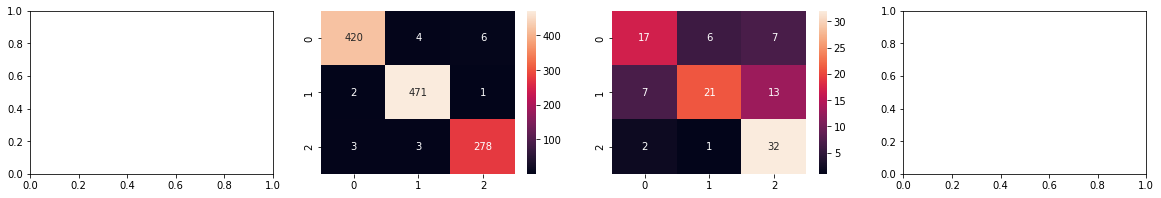

In [73]:
fig , ax = plt.subplots(nrows=1 , ncols=4 , figsize = (20,3))
#sns.boxplot(data = score , ax = ax[0])
cf = confusion_matrix(y_train , clf.predict(x_train))
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[1])
cf = confusion_matrix(y_test , clf.predict(x_test))
sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[2])
#cf = confusion_matrix(y_val , clf.predict(x_val))
#sns.heatmap(cf , annot=True ,fmt = '.0f' , ax = ax[3])
plt.show()